In [1]:
# import Tensorflow, Numpy, Matplotlib, and mount my google drive
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Fetch the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


0


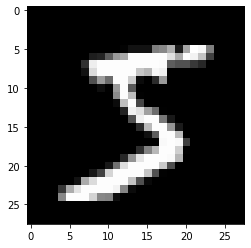

In [3]:
# Display a training image
plt.imshow(X_train[0],cmap='gray', vmin = 0, vmax = 255)
print(X_train[0, 0, 0])

In [27]:
# Invert the dataset
X_train = 255 - X_train
X_test = 255 - X_test

255


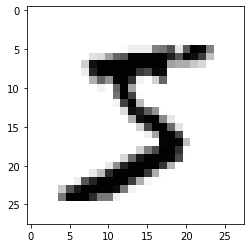

In [5]:
# Display the same training image as sanity check
plt.imshow(X_train[0],cmap='gray', vmin = 0, vmax = 255)
print(X_train[0, 0, 0])

In [6]:
# Add a dimension to the end of the train and test sets
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# Utility variables
dropout = 0.2
conv = 3
affine = 2

In [19]:
# Learning rate and Regularization optimization
for _ in range(5):

  # Randomly select a learning rate
  lr = 10**np.random.uniform(-4, -2.3)

  # Randomly select a regularization value
  reg = 10**np.random.uniform(-5, -4)

  # Print them out
  print("lr: %f reg: %f" % (lr, reg))

  # Define the model as Sequential
  model = tf.keras.models.Sequential()

  # Define the input
  model.add(tf.keras.layers.Input(shape=X_train.shape[1:]))

  # Add a dropout layer
  model.add(tf.keras.layers.Dropout(dropout))

  # Add convolutions, pooling, and more dropout
  for _ in range(conv):
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Dropout(dropout))

  # Flatten for transition to affine layers
  model.add(tf.keras.layers.Flatten())

  # Add affine layers and more dropout
  for _ in range(affine):
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.Dropout(dropout))

  # Add output layer with softmax activation
  model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(reg)))

  # Set loss and optimizer
  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr), metrics=['accuracy'])

  # Train
  model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, shuffle=True, verbose=1)

lr: 0.002177 reg: 0.000015
Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 1.1749 - accuracy: 0.6549 - val_loss: 0.1991 - val_accuracy: 0.9590
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3894 - accuracy: 0.8894 - val_loss: 0.1961 - val_accuracy: 0.9555
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3526 - accuracy: 0.9037 - val_loss: 0.1866 - val_accuracy: 0.9598
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3402 - accuracy: 0.9148 - val_loss: 0.1439 - val_accuracy: 0.9693
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3598 - accuracy: 0.9119 - val_loss: 0.1495 - val_accuracy: 0.9682
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3569 - accuracy: 0.9145 - val_loss: 0.1745 - val_accuracy: 0.9662
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3713 - accuracy: 0.9144 - val_

In [20]:
# Empirically chosen from testing in previous cell
lr = 0.000382
reg = 0.000015

In [28]:
# Implement the chosen values in a final model

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dropout(dropout))

for _ in range(conv):
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Flatten())

for _ in range(affine):
  model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
  model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(reg)))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr), metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, shuffle=True, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 2.1006 - accuracy: 0.4008 - val_loss: 0.3650 - val_accuracy: 0.9280
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4929 - accuracy: 0.8521 - val_loss: 0.1755 - val_accuracy: 0.9633
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3084 - accuracy: 0.9095 - val_loss: 0.1165 - val_accuracy: 0.9765
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2346 - accuracy: 0.9313 - val_loss: 0.0907 - val_accuracy: 0.9802
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1943 - accuracy: 0.9454 - val_loss: 0.0826 - val_accuracy: 0.9805
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1704 - accuracy: 0.9520 - val_loss: 0.0658 - val_accuracy: 0.9868
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1499 - accuracy: 0.9576 - val_loss: 0.0695 - val_accuracy:

In [37]:
# Evaluate it on a set the model has never seen
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9873


[0.05641253665089607, 0.9872999787330627]

In [30]:
# install tfmot for quantization
pip install -q tensorflow-model-optimization

     |████████████████████████████████| 237 kB 5.2 MB/s 


In [31]:
# import tfmot
import tensorflow_model_optimization as tfmot

In [39]:
# Quantize the model
q_aware_model = tfmot.quantization.keras.quantize_model(model)

# Set loss and optimizer again
q_aware_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr), metrics=['accuracy'])

# Print out model as sanity check
q_aware_model.summary()

# Perform fine tune training
q_aware_model.fit(X_train, y_train, batch_size=32, epochs=3, validation_split=0.1, shuffle=True, verbose=1)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_2 (QuantizeL  (None, 28, 28, 1)        3         
 ayer)                                                           
                                                                 
 quant_dropout_256 (Quantize  (None, 28, 28, 1)        1         
 WrapperV2)                                                      
                                                                 
 quant_conv2d_129 (QuantizeW  (None, 28, 28, 64)       771       
 rapperV2)                                                       
                                                                 
 quant_max_pooling2d_129 (Qu  (None, 14, 14, 64)       1         
 antizeWrapperV2)                                                
                                                                 
 quant_dropout_257 (Quantize  (None, 14, 14, 64)     

In [40]:
# Evaluate the quantized model
q_aware_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0654 - accuracy: 0.9845


[0.06544925272464752, 0.984499990940094]

In [62]:
# Convert the quantized model to TFLite format for high speed inference
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmph69e0k1a/assets


INFO:tensorflow:Assets written to: /tmp/tmph69e0k1a/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [63]:
# Evaluation method for TFLite model
def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  correct_num = 0

  # Run predictions on every image in the "test" dataset.
  for i, test_image in enumerate(X_test):
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = np.argmax(interpreter.get_tensor(output_index)[0])

    correct_num += int(output == y_test[i])

  accuracy = correct_num / len(X_test)

  return accuracy

In [64]:
# Set up interpreter and evaluate TFLite model
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)

Quant TFLite test_accuracy: 0.9844


In [65]:
# Switch mounted drive directory into desired directory
%cd '/content/gdrive/My Drive/APCSA_MNIST/'

/content/gdrive/My Drive/APCSA_MNIST


In [67]:
# import time so that every model save has a unique name
import time

In [68]:
# save TFLite model in drive for download onto computer
with open("quant-default-" + str(int(time.time())) + ".tflite", "wb") as f:
  f.write(quantized_tflite_model)